# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **TikTok**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **TikTok**: No authentication required!
   - **ESPN**: No authentication required!

In [2]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [ ]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "ADD YOUR ID HERE"
SPOTIFY_CLIENT_SECRET = "ADD YOUR SECRET HERE"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [25]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Write a clear research question that requires concepts covered in Unit 3 to analyze.
- **My Study:** State the API you will be using. Then, describe how much data you will randomly collect from the API.
- **My Analysis:** Perform the analysis you need. Remember, a level 4 requires 3 different techniques to be included in your analysis.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualizations you make and the specific values you find.

# 📝 My Question

*Does 60% of Spotify's songs have a popularity score over 70?*

# 📊 My Study

*Describe your study design: One-sided right tail test*

- **I am using my Spotify API**
- **I want to measure the probability of songs having a popularity over 70** 
- **I want to collect a sample of 1,000 randomly unique songs**

# 🔬 My Analysis

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import requests
import json
import random
import asyncio
import os

In [2]:
# Perform your analysis here. 
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "620ac0623d894c0487fba11adf8a49f2"
SPOTIFY_CLIENT_SECRET = "dd9868320c4e45f19444d5386423383d"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [3]:
# Search for a random popular track
raw_df = {
    'popularity' : [],
}


count = 0


while count < 1000:
    search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
    spotify_response = requests.get(
        'https://api.spotify.com/v1/search',
        headers=headers,
        params={'q': search_query, 'type': 'track', 'limit': 50}
    )
    spotify_data = spotify_response.json()
    raw_df["popularity"].append(spotify_data['tracks']['items'][0]['popularity'])
    count = count + 1

In [4]:
print(raw_df["popularity"])

[59, 92, 59, 92, 54, 92, 92, 56, 92, 59, 54, 56, 92, 54, 59, 92, 54, 92, 56, 54, 59, 56, 59, 59, 92, 92, 92, 56, 79, 56, 59, 59, 56, 54, 59, 79, 59, 92, 54, 54, 92, 56, 79, 56, 92, 54, 92, 56, 59, 92, 92, 54, 59, 59, 56, 56, 79, 92, 59, 92, 92, 56, 56, 79, 79, 79, 54, 54, 92, 56, 56, 54, 54, 79, 56, 54, 59, 54, 79, 92, 79, 79, 54, 59, 92, 79, 56, 92, 79, 54, 79, 92, 79, 92, 54, 79, 54, 56, 79, 79, 56, 79, 92, 56, 92, 92, 54, 59, 59, 92, 56, 79, 59, 54, 79, 79, 54, 54, 92, 59, 56, 92, 59, 54, 54, 54, 56, 56, 56, 56, 54, 56, 79, 92, 79, 54, 54, 92, 92, 54, 79, 54, 54, 79, 54, 79, 79, 79, 54, 92, 56, 59, 54, 92, 59, 56, 54, 56, 54, 54, 56, 54, 79, 54, 92, 59, 79, 92, 56, 92, 54, 56, 92, 56, 56, 92, 59, 79, 59, 56, 54, 92, 54, 79, 56, 54, 92, 79, 79, 92, 56, 59, 56, 59, 79, 56, 54, 92, 59, 79, 92, 56, 59, 56, 54, 54, 54, 92, 59, 59, 92, 79, 54, 54, 59, 79, 56, 59, 56, 54, 92, 54, 56, 79, 56, 79, 56, 54, 79, 92, 56, 79, 59, 56, 79, 56, 59, 59, 54, 54, 79, 92, 59, 92, 92, 92, 79, 59, 92, 59,

<Axes: xlabel='popularity', ylabel='Count'>

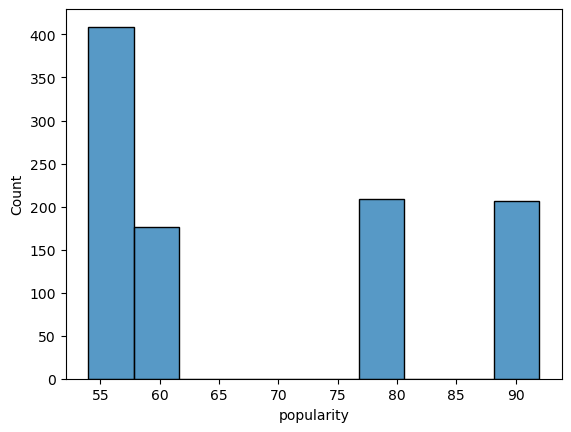

In [5]:
sns.histplot(data=raw_df, x='popularity', bins=10)

In [9]:
import statistics
import math
mean = statistics.mean(raw_df["popularity"])
print("Mean :", mean)
SD = statistics.stdev(raw_df["popularity"])
print("Standard Deviation", SD)
cv = 1.282
SE = SD/math.sqrt(1000)
print("Standard Error", SE)
ME = cv * SE
print("Method Error", ME)
CIupper = mean + ME
print("Upper Confidence Interval", CIupper)
CIlower = mean - ME
print("Lower Confidence Interval", CIlower)

Mean : 68.367
Standard Deviation 15.072275358567614
Standard Error 0.47662719654304714
Method Error 0.6110360659681865
Upper Confidence Interval 68.9780360659682
Lower Confidence Interval 67.75596393403181


# ✅ My Answer

Write your conclusion in complete sentences. Interpret specific values that you find and tell me what I should believe as a reader of your study. Assume I know nothing! Finally, include any limitations that you encountered while performing your analysis that may impact your results.

# No, 60% of Spotify songs do NOT have a popularity score of over 70.
 The null hypothesis was that 60% of the songs have a popularity score of 70, while the alternative hypothesis would be that over 60% of the songs have a popularity score of 70. The Standard error was 0.477, The method error was 0.611, the upper confidence interval is 68.97, and the lower confidence interval is 67.76.
 # I am 90% confident that the average population score is between 67.76 and 68.98.